In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the whitespace-separated data
df = pd.read_csv('../simulations/bit_data.txt', sep=r'\s+')

# Display the first few rows
df

,time,D0,D1,D2,D3,D4,D5,D6,D7,vin_diff,dac_clk
0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0
1,1.000000e-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.769911e-08,0.0
2,2.000000e-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.539822e-08,0.0
3,4.000000e-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.507964e-07,0.0
4,8.000000e-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.015929e-07,0.0
...,...,...,...,...,...,...,...,...,...,...,...
43876,1.999083e-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.457593e-03,1.2
43877,1.999165e-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.148766e-03,1.2
43878,1.999329e-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.531111e-03,1.2
43879,1.999656e-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.295793e-03,1.2


In [69]:
def verilog_a_dac_from_df(df, vmin=-1.2, vmax=1.2, vdd=1.2, vss=0.0,
                          thresh=None, dir=1, td=0, tt=0):
    if thresh is None:
        thresh = (vdd + vss) / 2.0

    # Verilog-A bit order: i1 (LSB) to i8 (MSB)
    bits = ['D0', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D0']  # D0 is MSB in your DF
    fullscale = vmax - vmin

    clk = df['dac_clk'].values
    time = df['time'].values
    output = np.zeros(len(df))
    prev_clk = clk[0]
    aout = 0

    for i in range(len(df)):
        clk_edge = False
        if dir == 1 and prev_clk <= thresh and clk[i] > thresh:
            clk_edge = True  # Rising edge
        elif dir == -1 and prev_clk >= thresh and clk[i] < thresh:
            clk_edge = True  # Falling edge

        if clk_edge or i == 0:  # i == 0 handles initial_step
            aout = 0
            weight = 2
            for bit in bits:
                if df[bit].iloc[i] > thresh:
                    aout += fullscale / weight
                weight *= 2
            output[i] = aout + vmin
        else:
            output[i] = output[i - 1]  # Hold previous value

        prev_clk = clk[i]

    return output

df['dac_out'] = verilog_a_dac_from_df(df)


In [70]:
df['dac_out']

0       -1.2
1       -1.2
2       -1.2
3       -1.2
4       -1.2
        ... 
43876   -1.2
43877   -1.2
43878   -1.2
43879   -1.2
43880   -1.2
Name: dac_out, Length: 43881, dtype: float64

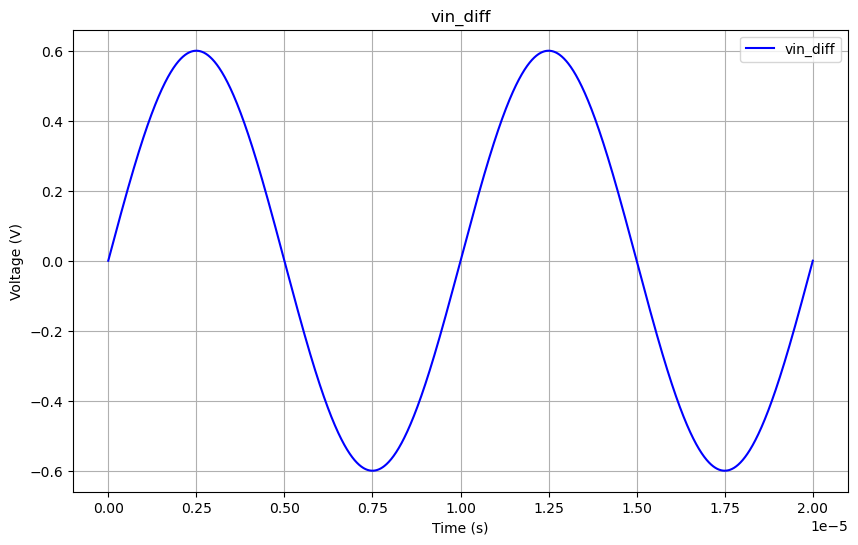

In [71]:
# Convert the pandas Series to numpy arrays
time = df['time'].values
vin_diff = df['vin_diff'].values

# Plot vin_diff and analog_voltage
plt.figure(figsize=(10, 6))

# Plot vin_diff (e.g., as a blue line)
plt.plot(time, vin_diff, label='vin_diff', color='blue', linestyle='-')

# Add labels and title
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('vin_diff')

# Add a legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

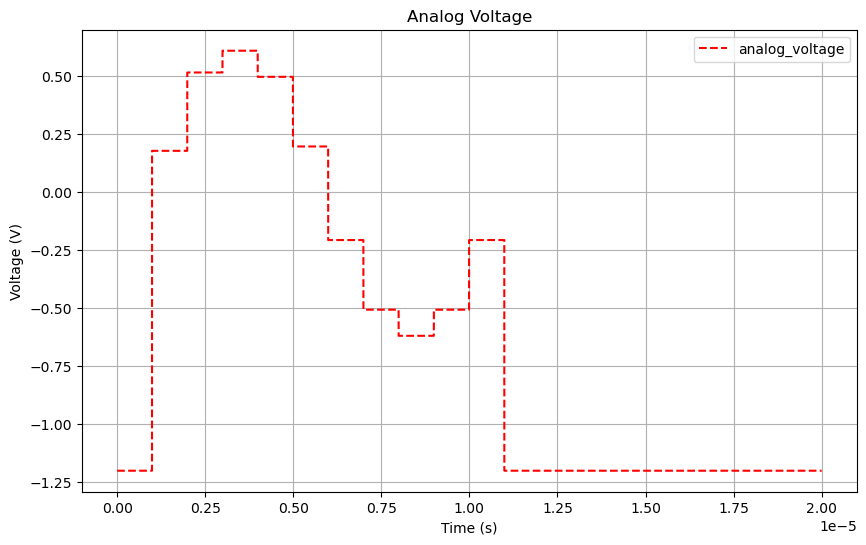

In [72]:
# Convert the pandas Series to numpy arrays
time = df['time'].values
analog_voltage = df['dac_out'].values

# Plot vin_diff and analog_voltage
plt.figure(figsize=(10, 6))


# Plot analog_voltage (e.g., as a red dashed line)
plt.plot(time, analog_voltage, label='analog_voltage', color='red', linestyle='--')

# Add labels and title
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Analog Voltage')

# Add a legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()